In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
from sklearn.datasets import make_swiss_roll
import matplotlib
import matplotlib.pyplot as plt

import sbgm

In [2]:
key = jr.key(0) 

X, _ = make_swiss_roll(1000, noise=0.02)
X = X[:, [0, 2]]

n_data, data_dim = X.shape

n_t = 36
n_side = int(jnp.sqrt(n_t))

colors = matplotlib.cm.coolwarm(jnp.linspace(0., 1., n_t))

eps = jr.normal(key, (n_data, data_dim))

In [3]:
sde = sbgm.sde.VESDE(sigma_fn=lambda t: t) 

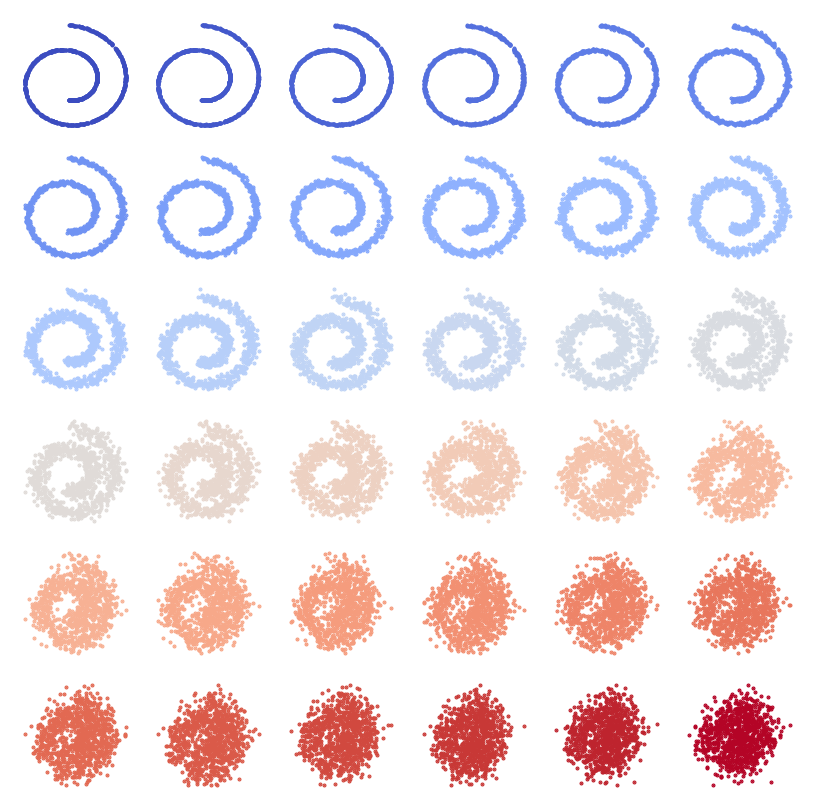

In [4]:
def diffuse(x, t, eps):
    mu, std = sde.marginal_prob(x, t)
    return mu + std * eps
    
Xt = X
fig, axs = plt.subplots(n_side, n_side, dpi=200, figsize=(5., 5.))
for i, t in enumerate(jnp.linspace(1e-3, 1., n_t)):
    ax = axs.ravel()[i]

    eps = jr.normal(jr.fold_in(key, i), (n_data, data_dim))

    Xt = jax.vmap(diffuse, in_axes=(0, None, 0))(Xt, t, eps)

    ax.scatter(*Xt.T, color=colors[i], s=0.2)
    ax.axis("off")
plt.show()

In [5]:
sde = sbgm.sde.VPSDE(beta_integral_fn=lambda t: t)

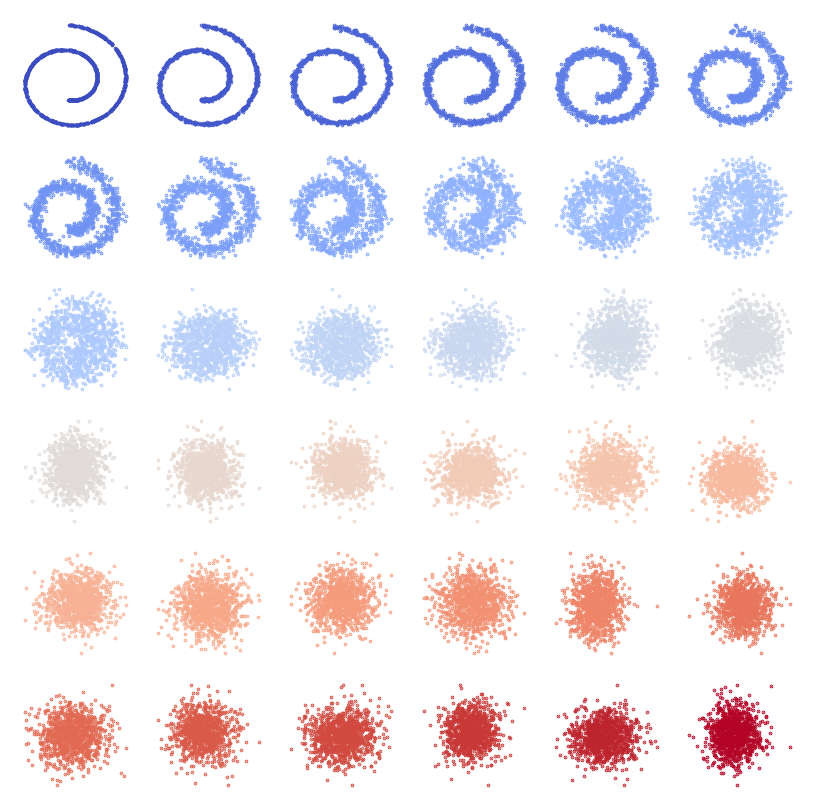

In [6]:

def diffuse(x, t, eps):
    mu, std = sde.marginal_prob(x, t)
    return mu + std * eps
    
Xt = X
fig, axs = plt.subplots(n_side, n_side, dpi=200, figsize=(5., 5.))
for i, t in enumerate(jnp.linspace(0., 1., n_t)):
    ax = axs.ravel()[i]

    eps = jr.normal(jr.fold_in(key, i), (n_data, data_dim))

    Xt = jax.vmap(diffuse, in_axes=(0, None, 0))(Xt, t, eps)

    ax.scatter(*Xt.T, color=colors[i], s=0.1)
    ax.axis("off")
plt.show()

In [7]:
sde = sbgm.sde.SubVPSDE(beta_integral_fn=lambda t: t)

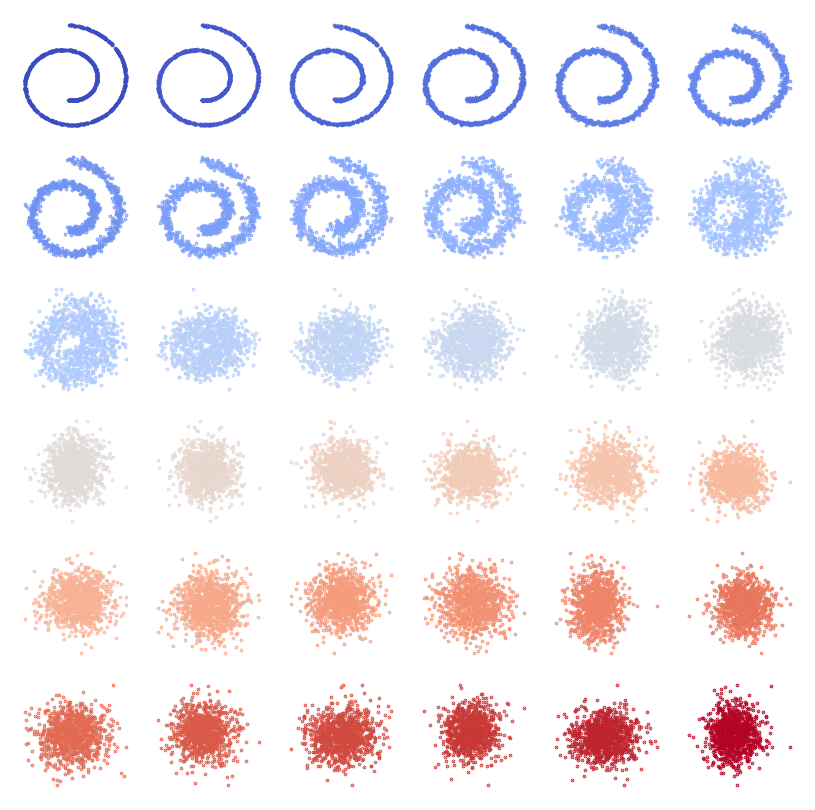

In [8]:
def diffuse(x, t, eps):
    mu, std = sde.marginal_prob(x, t)
    return mu + std * eps
    
Xt = X
fig, axs = plt.subplots(n_side, n_side, dpi=200, figsize=(5., 5.))
for i, t in enumerate(jnp.linspace(0., 1., n_t)):
    ax = axs.ravel()[i]

    eps = jr.normal(jr.fold_in(key, i), (n_data, data_dim))

    Xt = jax.vmap(diffuse, in_axes=(0, None, 0))(Xt, t, eps)

    ax.scatter(*Xt.T, color=colors[i], s=0.1)
    ax.axis("off")
plt.show()